# RDKit Fingerprints

---

## Table of contents

- [What are Fingerprints?](#What-are-Fingerprints?)
- [Generating Fingerprints](#Generating-Fingerprints)
- [Fingerprint typess](#Fingerprint-types)
- [Comparision to other fingerprints](#Comparision-to-other-fingerprints)
- [Tanimoto Similarity](#Tanimoto-Similarity)
- [Visualizing Fingerprint Bits](#Visualizing-Fingerprint-Bits)


## What are Fingerprints?

Fingerprints are a way to represent molecules as bit vectors or count vectors, which can be usefulf for various task such as similarity searching, clusterning, and machine learning. The RDKit provides several different fingerprinting algorithms and figerprint types. 

## Generating Fingerprints

RDKit provides a consistent interface for generating different types of fingerprints through the `rdFingerprintGenerator` module. Here's how to generate Morgan figerprints:

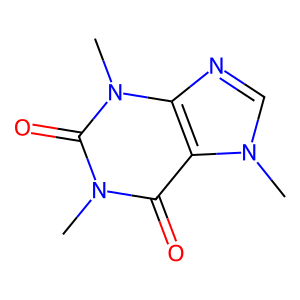

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

# Get a molecule
mol = Chem.MolFromSmiles("Cn1cnc2c1c(=O)n(C)c(=O)n2C")
Draw.MolToImage(mol, size=(300, 300))

In [16]:
# Create a Morgan fingerprint generator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Generate Fingerprints
fp = mfpgen.GetFingerprint(mol)
print(fp.ToList()[:10])

#ao = rdFingerprintGenerator.AdditionalOutput()

#ao.AllocateAtomCounts()
#ao.AllocateAtomToBits()
#ao.AllocateBitInfoMap()

#fp = mfpgen.GetFingerprint(mol, additionalOutput=ao)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Fingerprint types

The differences between those fingerprint types are:

1. **Bit Vector** (fp):
    - Represented as a dense bit vector (arrays of 0s and 1s)
    - Fixed length determined by the `fpSize` parameter when creating the generator
    - Each bit position corresponds to the presenence (1) or absence (0) of a particular molecular substructure/pattern.
    - Efficient storage and compuatation, but can suffere from bit collisions.
      
2. **Count Vector** (cfp):
   - Represented as an array of counts (non-negative intergers)
   - Fixed length determined by the `fpSize` parameter.
   - Each position stores the count of a particular molecular substructure/pattern.
   - Provides more information than bit vectors, but requires more storage space.

The choice between bit vector or count vector depends on your specific use case and computational requirements. Bit vectors are efficient and widely used, but can suffer from bit collisions. Count vectors provide more information but require more storage. Moreover, it is possilbe to compute sparse representations (most entries are zero): they store only the indices (and counts, if applicable) of nonzero entries, reducing memory and often speeding up computation.


In [27]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# Create a Morgan fignerprint generator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Get a molecule (Paracetamol)
mol = Chem.MolFromSmiles("CC1=C2[C@@]([C@]([C@H]([C@@H]3[C@]4([C@H](OC4)C[C@@H]([C@]3(C(=O)[C@@H]2OC(=O)C)C)O)OC(=O)C)OC(=O)c5ccccc5)(C[C@@H]1OC(=O)[C@H](O)[C@@H](NC(=O)c6ccccc6)c7ccccc7)O)(C)C")
Draw.MolToImage(mol, size=(300, 300))

# Generate fingerprints
fp = mfpgen.GetFingerprint(mol) # Bit vector
cfp = mfpgen.GetCountFingerprint(mol) # Count vector


# Print first 10 entries
print(f"First entries of bit vector: {fp.ToList()[:10]}")
print(f"First entries of count vector: {cfp.ToList()[:10]}")

First entries of bit vector: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
First entries of count vector: [0, 2, 0, 0, 0, 0, 0, 0, 0, 0]


## Comparision to other fingerprints

---
Other fingerprints than the Morgan one, such as RDKit, Atom Pairs, and Topological Torsions, can be generated similarly.


```Python
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
```

1. **Morgan Fingerprint**: The Morgan Fingerprint is a circular fingerprint, which means it captures the local environment around each atom up to a specified radius. It is also know as the Extended Connectivity Fingerprint (ECFP).

   The algorithm works by:
   * Give the atom an initial label (element, valence, aromaticity, neighbors)
   * Expand outward step by step (Each step includes atoms one bond further away)
   * Combine the information into a unique identifier describing that local environment.
   * Hash identifiers into a fixed-length vector.

Morgan fingerprints are widely used due to their ability to capture structural information in a compact representation. They are well-suited for similarity searching and machine learning tasks.

2. **RDKit Fingerprint**: The RDKit fingerprint is a path-based fingerprint that enumerates all linear and branched subgraphs (path).

   The algorithm works by:
   * Walk along bonds
   * Collect sequence of atoms up to length 7 bonds.
   * Convert each sequence into a hash.
   * Turn hases into bits inside a vector

     
The RDKit fingerprint is a widely used and efficient fingerprint type in the RDKit. It is particularly useful for substructur searching and similarity calculations.

3. **Atom Pairs Fingerprint**; The Atom pairs fingerprint is a topological fingerprint that captures information about the distances between pairs of atoms in a molecule.

   The algorithm works by:
   * Enumerating all pairs of non-hydrogen atoms in the molecule.
   * Computing the shortest path distance (number of bonds) between each pair.
   * Hashing each (atom type, atom type, distance) tuple to generate the fingerprint.

4. **Topological Torsion Fingerprint**: The topological torsion fingerprint is a variant of the Atom pairs fingerprint that captures information about the angles (torsions) between parirs of atoms in a molecule.

    The algorithm works by:
   * Enumerating all path of length 4 (torsions) in the molecule.
   * Optinally including bond orders and ring formation.
   * Hashing each (atom1, atom2, atom3, atom4) tuple to generate the fingerprint.

All of these fingerprint types have their strengths and weakness, and the choice of which one to use depends on the specific application and the trade-off between compuational cost, storage 


## Tanimoto Similarity

The Tanimot similarity is a widely used metric for comparing fingerprints. It ranges from 0 (no bits in common) to 1 (identical fingerprints).

Further reading: [Tanimoto Vs. Mol2vec](https://medium.com/gsi-technology/tanimoto-vs-mol2vec-7fa4af3208ef)

Here's an example of computing Tanimoto similarity between caffeine and theophylline:

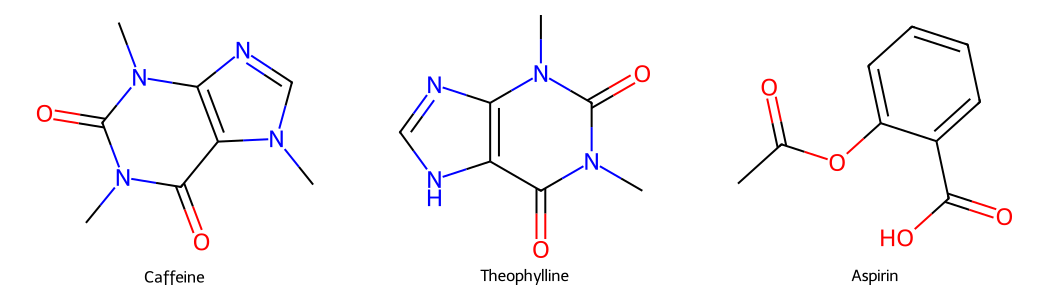

In [31]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, DataStructs

caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
theophylline = Chem.MolFromSmiles('CN1C2=C(C(=O)N(C1=O)C)NC=N2')
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')

mols = [caffeine, theophylline, aspirin]
names = ["Caffeine", "Theophylline", "Aspirin"]

img = Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(350, 300),
    legends=names
)

img

In [34]:
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
caffeine_fp = mfpgen.GetFingerprint(caffeine)
theophylline_fp = mfpgen.GetFingerprint(theophylline)
aspirin_fp = mfpgen.GetFingerprint(aspirin)

tanimoto_sim_caffeine_theophylline = DataStructs.TanimotoSimilarity(caffeine_fp, theophylline_fp)
tanimoto_sim_caffeine_aspirin = DataStructs.TanimotoSimilarity(caffeine_fp, aspirin_fp)

print(f"Tanimoto similarity between caffeine and theophylline: {tanimoto_sim_caffeine_theophylline}")
print(f"Tanimoto similarity between caffeine and aspirin: {tanimoto_sim_caffeine_aspirin}")

Tanimoto similarity between caffeine and theophylline: 0.45714285714285713
Tanimoto similarity between caffeine and aspirin: 0.08888888888888889


**N.B.**: The RDKit provides a `BulkTanimotoSimilarity` function for efficiently computing Tanimoto similarities between many fingerprints.

## Visualizing Fingerprint Bits

---

Visualizing the bits of molecular fingerprints can be incredibly helpful for understanding the chemical features they represent. RDKit provides functionality to visualize these bits directly on the molecules. Here's how you can do it for both Morgan and RDKit (path-based) fingerprints. 

## Morgan Fingerprints

Morgan figerprints, also know as circular fingerprints, are based on the connectivity of atoms up to a certain radius. To visualize which parts of a molecule correposnd to specific bits in a Morgan fingerprint, we can use the Draw.DrawMorganBit function.

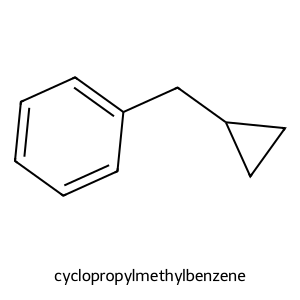

In [38]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Create a molecule from SMILES
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
Draw.MolToImage(mol, size=(300, 300), legend="cyclopropylmethylbenzene")

{29: ((7, 1),), 42: ((0, 2), (4, 2)), 45: ((8, 1), (9, 1)), 61: ((7, 2),), 64: ((1, 1), (2, 1), (3, 1)), 80: ((6, 0),), 81: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0)), 100: ((5, 0),), 104: ((6, 2),), 133: ((2, 2),), 135: ((8, 2),), 158: ((8, 0), (9, 0)), 175: ((3, 2), (1, 2)), 176: ((5, 2),), 202: ((6, 1),), 214: ((4, 1), (0, 1)), 218: ((5, 1),), 251: ((7, 0),)}


[23:49:01] DEPRECATION WARNING: please use MorganGenerator


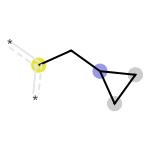

In [57]:
from IPython.display import SVG, display
# Generate Morgan fingerprint with bit information


bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi, nBits=256)

print(bi)
mfp2_svg = Draw.DrawMorganBit(mol, 61, bi, useSVG=True)
display(SVG(mfp2_svg), width=600)

In the example above, bi will contain a mapping of bit indices to the atoms they correspond to, allowing DrawMorganBit to highlight the relevant substructure in the molecule. Let's plot 3 more in order to understand clearly. 

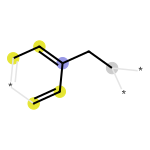

In [58]:
mfp2_svg = Draw.DrawMorganBit(mol, 176, bi, useSVG=True)
display(SVG(mfp2_svg), width=600)

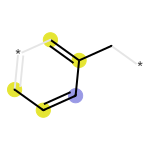

In [59]:
mfp2_svg = Draw.DrawMorganBit(mol, 42, bi, useSVG=True)
display(SVG(mfp2_svg), width=600)

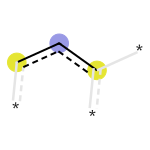

In [60]:
mfp2_svg = Draw.DrawMorganBit(mol, 214, bi, useSVG=True)
display(SVG(mfp2_svg), width=600)